In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

from uav_env import *

### **state Space**
$(x, y, p_x, p_y, angle, L, mass, intertia)$ : most simplified

### **observation**
(FOV array)

### **Action space**
(Propulsion (acc in facing angle), angular velocity)
```python
thrust, angular_momentum = action
thrust = np.clip(thrust, 0., 1.)
angular_momentum = np.clip(angular_momentum, -1., 1.) * UAV_ANG_POW
thrust_force = thrust_direction * thrust * UAV_THRUST_POW
```
Note the input of thrust and angular momentum needs to be interpretated as 0-100%, -100%-100%

### **Rewards**
*   increase/decrease the closer/durther the agent is to the goal.
*   increase/decrease the larger/smaller the magnitute of velocity $||v||$.
*   increase/decrease the larger/smaller the $\%$ of obstacle in FOV.

The episode receive an additional reward of -100 for crashing.

An episode is considered a solution if it reaches score.

### **Starting State**
The agent starts at the left ceter of the viewpoirt, with a initial $v_x$

### **Episode Termination**
If:
* The agent crashes
* The agent gets outside of the viewport

raw_reward:  [-3.39887025e-02  0.00000000e+00  9.12042375e-01 -2.98547691e+01
 -2.00000000e-03] 
reward:  -130.0084717642538
[ 0.50437495  0.53033092  0.62344146  0.85809422  1.63219134 10.
 10.         10.         10.         10.         10.         10.
 10.         10.         10.         10.          1.63219134  0.85809345
  0.62344202  0.53033151]
state:  [ 1.866375   -0.79390504  0.          0.          0.         -0.0339887
 -0.27632703  0.9495625   0.94696691  0.93765585  0.91419058  0.83678087
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.83678087
  0.91419066  0.9376558   0.94696685]
0.0 29.09954539135937 -0.27632703004537795


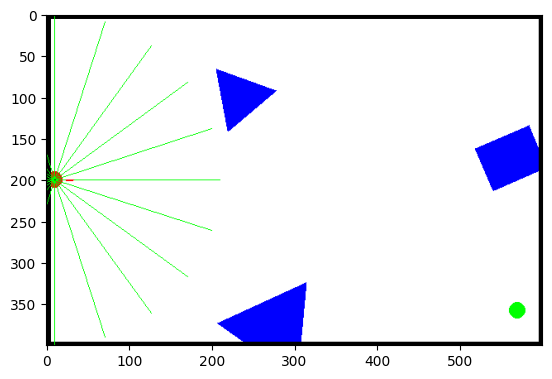

In [2]:
env = SimpleUAVEnv()
env.reset()
total_steps = 10  # Total number of steps in the test
thrust_increment = 1  # Increment in thrust per step
angular_momentum = 0  # Constant angular momentum (for simplicity)

# Run the test
for step in range(total_steps):
    # Gradually increase thrust
    thrust = thrust_increment 

    # Create the action (thrust, angular momentum)
    action = 1

    # Perform a step in the environment
    state, reward, done, raw_reward = env.step(action)

    # Render the current state
    frame = env.render()

    # Break the loop if the episode is done
    if done:
        break

    # Pause for a short time to see the animation
    time.sleep(0.1)

# Close the environment
env.close()
print('raw_reward: ', raw_reward, '\nreward: ', reward)
print(env._get_obs())
print('state: ', state)
print(env.uav.angle,env.dist2goal, env.ang2goal)
plt.imshow(frame)

#raw_reward = np.array((distance_reward/REW_DIST2GOAL,  velocity_reward/REW_VEL, angle_reward/REW_ANGLE, fov_reward, act_reward))

In [3]:
fov_reward = 0
print('OBS Offset: ', OBS_OFFSET, 'UAV Radius: ', UAV_RADIUS)
for distance in env._get_obs():
    print('distance: ', distance, ' PEN: ', env._leakyrelu_penalty(distance, offset=OBS_OFFSET, max_penalty=PEN_COLLISION)*PEN_OBSTACLE)

OBS Offset:  1.5 UAV Radius:  0.5
distance:  0.5043749511241913  PEN:  -99.56250488758087
distance:  0.5303309249068913  PEN:  -96.96690750931087
distance:  0.6234414583225992  PEN:  -87.65585416774007
distance:  0.8580942201606324  PEN:  -64.19057798393676
distance:  1.6321913438833744  PEN:  0.0001321913438833744
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  10.0  PEN:  0.0085
distance:  1.6321913438833744  PEN:  0.0001321913438833744
distance:  0.858093448621968  PEN:  -64.1906551378032
distance:  0.623442018878257  PEN:  -87.6557981121743
distance:  0.5303315143098257  PEN:  -96.96684856901743


Episode 59	Average Score: -124.18Goal reached! Vel:  52.49700927734375


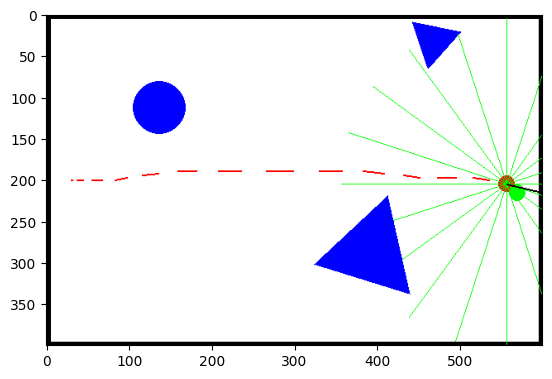

Episode 100	Average Score: -111.41

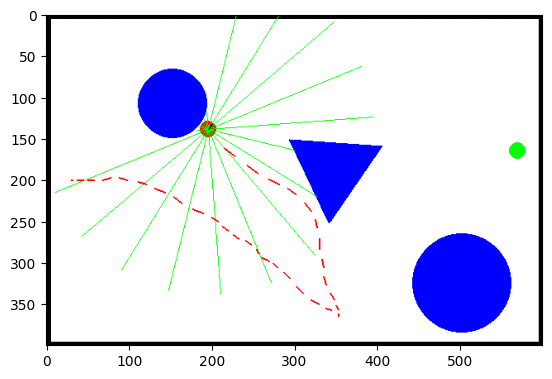

Episode 100	Average Score: -111.41, Eps: 0.606, Terminal vel: 6.905, angle:0.07, dist2goal: 18.73, ang2goal: -0.15, step: 67
Episode 112	Average Score: -102.12Goal reached! Vel:  38.19718933105469


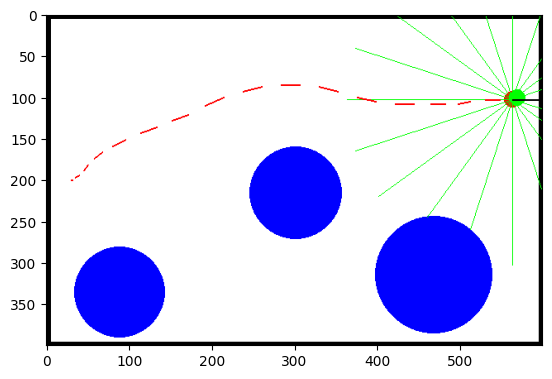

Episode 126	Average Score: -87.91Goal reached! Vel:  63.66197204589844


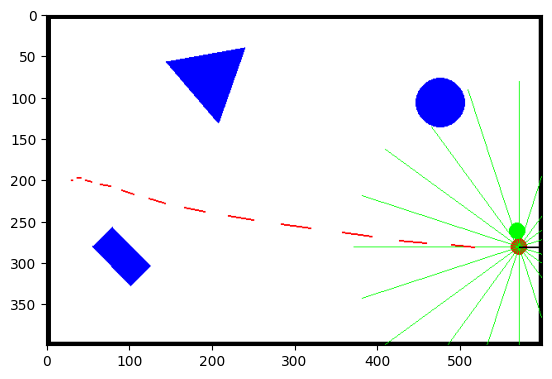

Episode 200	Average Score: 7.5027

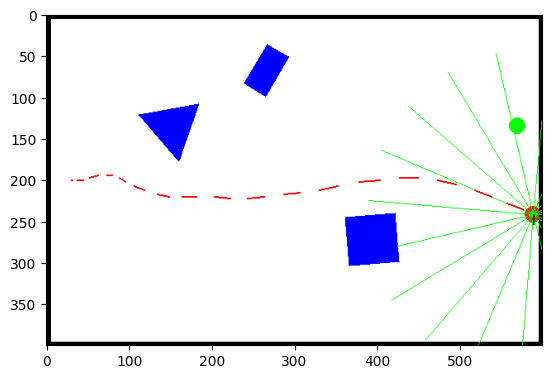

Episode 200	Average Score: 7.50, Eps: 0.367, Terminal vel: 12.690, angle:0.23, dist2goal: 5.42, ang2goal: 1.53, step: 32
Episode 211	Average Score: 21.73Goal reached! Vel:  32.461368560791016


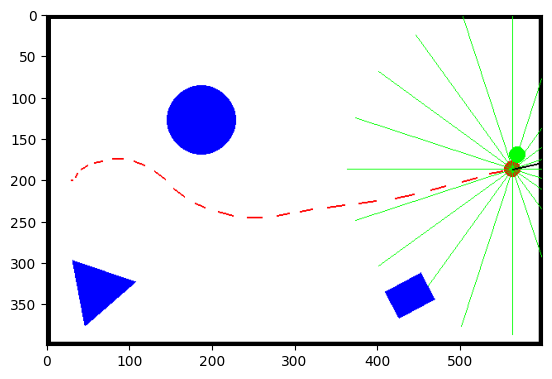

Episode 239	Average Score: 57.90Goal reached! Vel:  14.235249519348145


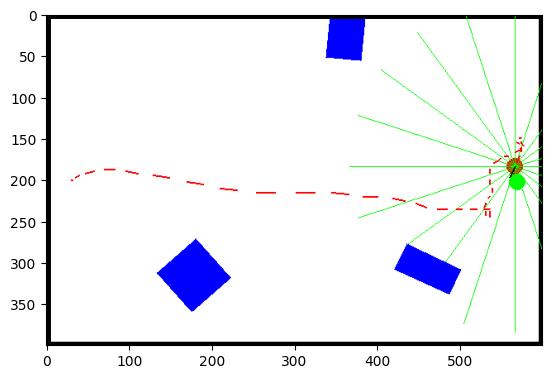

Episode 251	Average Score: 60.02Goal reached! Vel:  26.248510360717773


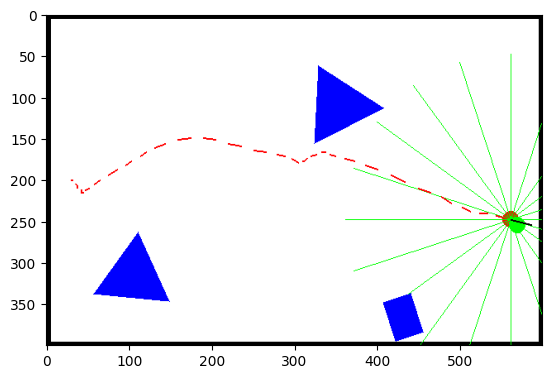

Episode 255	Average Score: 66.38Goal reached! Vel:  28.470502853393555


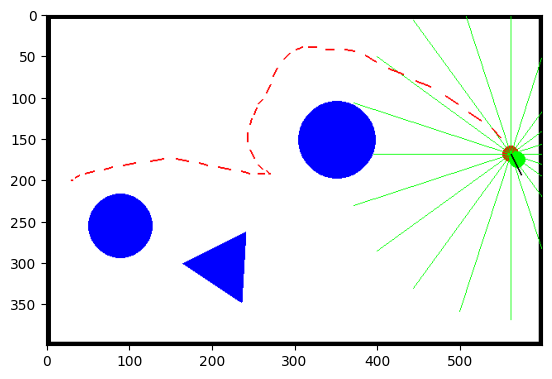

Episode 256	Average Score: 68.68Goal reached! Vel:  19.09859275817871


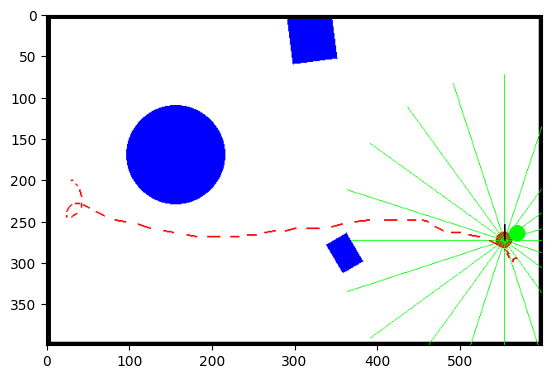

Episode 267	Average Score: 61.30Goal reached! Vel:  22.95365333557129


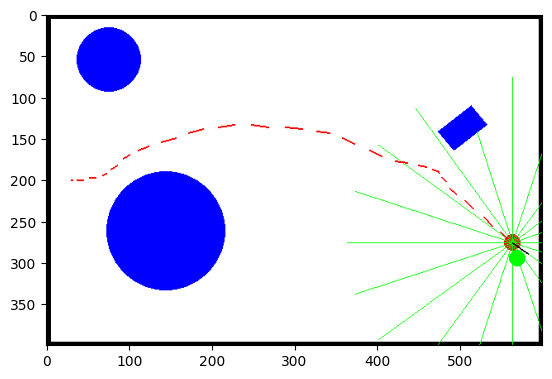

Episode 281	Average Score: 66.53Goal reached! Vel:  6.36619758605957


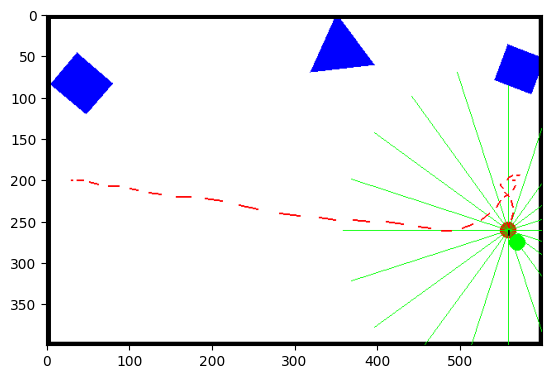

Episode 284	Average Score: 68.17Goal reached! Vel:  20.13168716430664


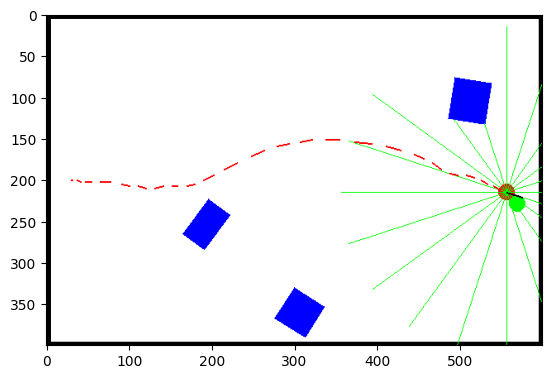

Episode 288	Average Score: 76.26Goal reached! Vel:  6.36619758605957


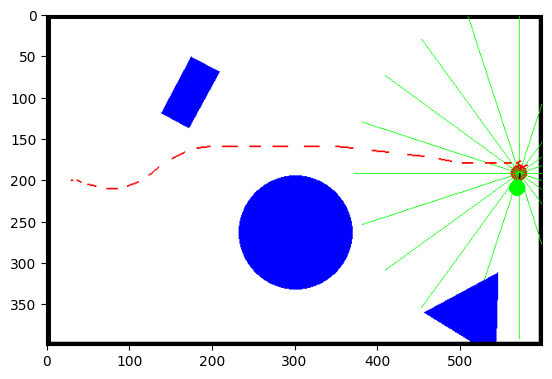

Episode 295	Average Score: 75.73Goal reached! Vel:  20.13168716430664


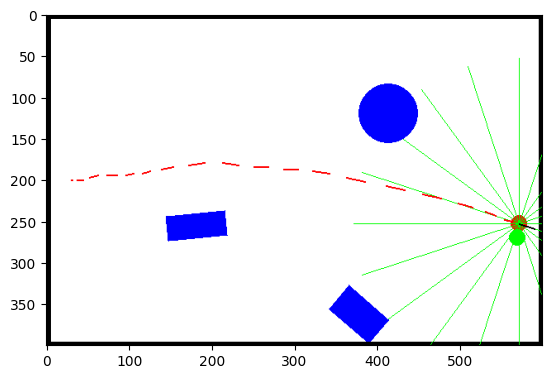

Episode 300	Average Score: 83.72

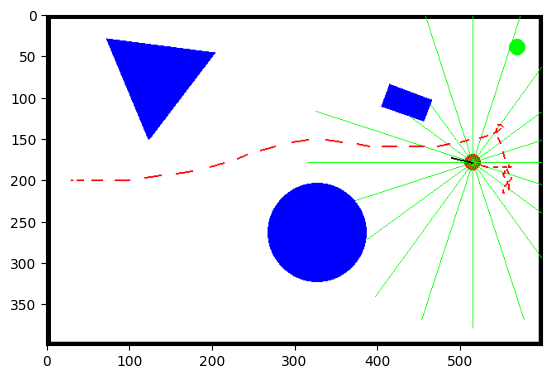

Episode 300	Average Score: 83.72, Eps: 0.222, Terminal vel: 26.249, angle:0.00, dist2goal: 7.44, ang2goal: 1.20, step: 99
Goal reached! Vel:  6.366201400756836


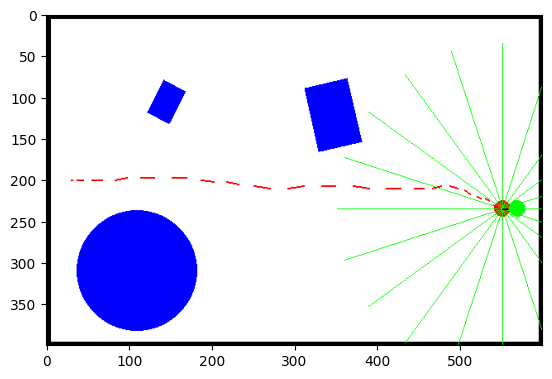

Episode 306	Average Score: 88.36Goal reached! Vel:  14.235254287719727


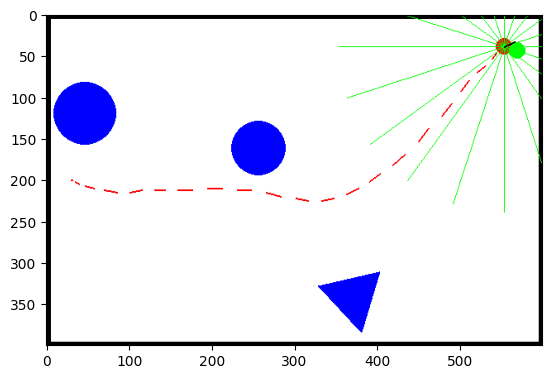

Episode 317	Average Score: 77.75Goal reached! Vel:  6.366201400756836


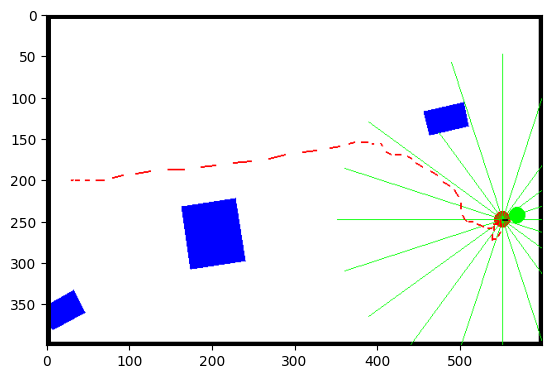

Episode 324	Average Score: 81.79Goal reached! Vel:  27.009490966796875


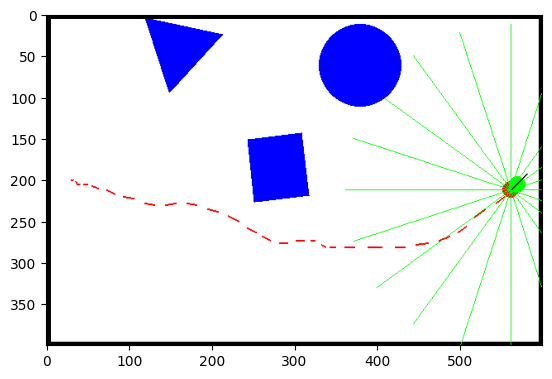

Episode 325	Average Score: 82.05Goal reached! Vel:  12.73239517211914


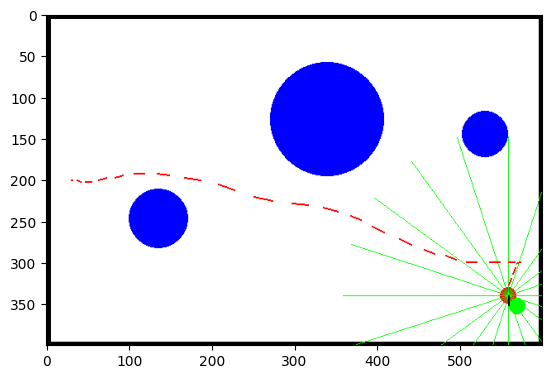

Episode 326	Average Score: 84.68Goal reached! Vel:  6.36619758605957


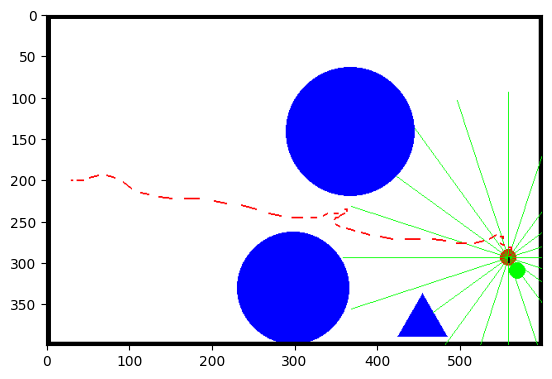

Episode 332	Average Score: 95.47Goal reached! Vel:  14.235252380371094


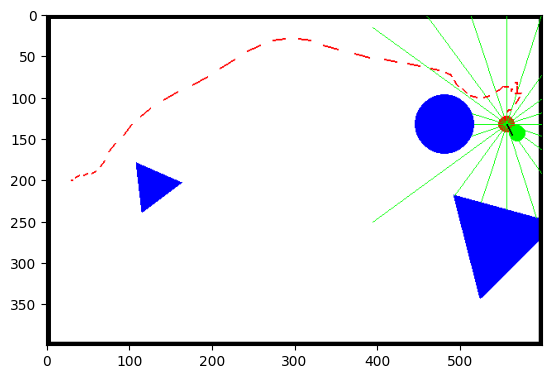

Episode 334	Average Score: 98.68Goal reached! Vel:  14.235254287719727


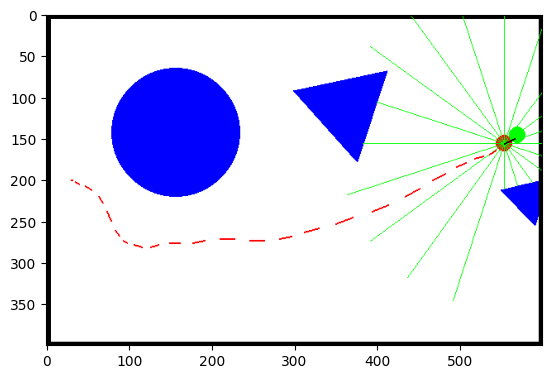

Episode 341	Average Score: 95.37Goal reached! Vel:  9.003165245056152


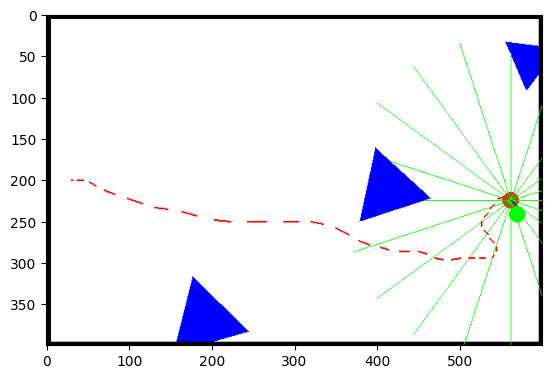

Episode 342	Average Score: 99.93Goal reached! Vel:  6.366201400756836


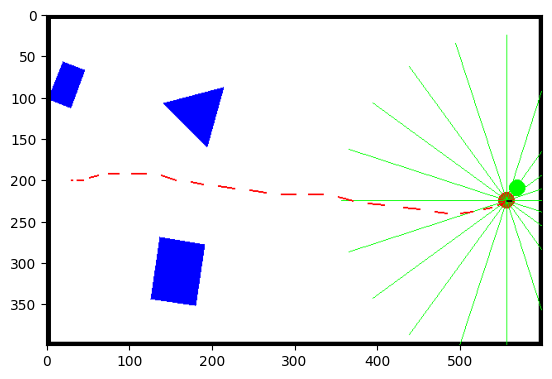

Episode 343	Average Score: 102.50Goal reached! Vel:  9.00316047668457


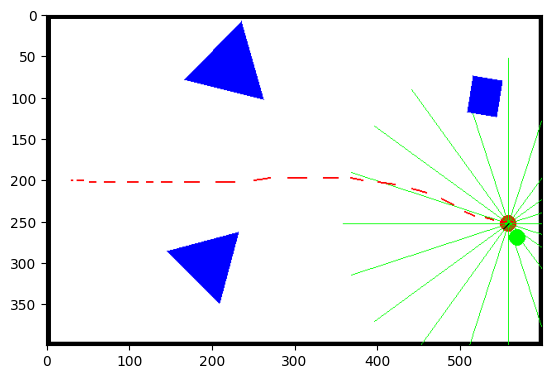

Episode 357	Average Score: 108.27Goal reached! Vel:  19.09859275817871


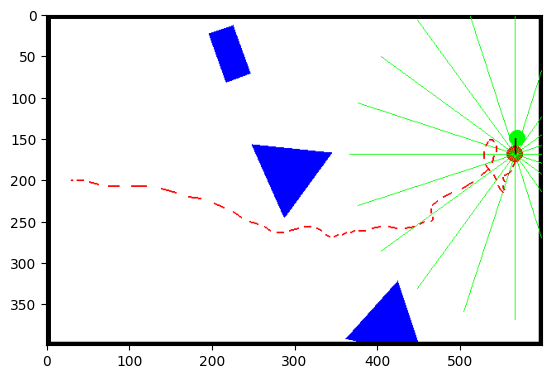

Episode 358	Average Score: 111.98Goal reached! Vel:  27.009490966796875


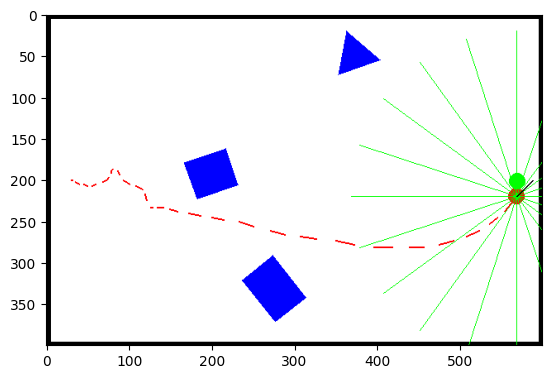

Episode 364	Average Score: 121.93Goal reached! Vel:  14.235252380371094


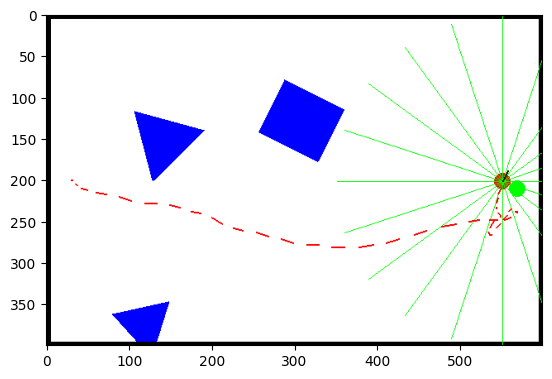

Episode 365	Average Score: 123.50Goal reached! Vel:  20.13168716430664


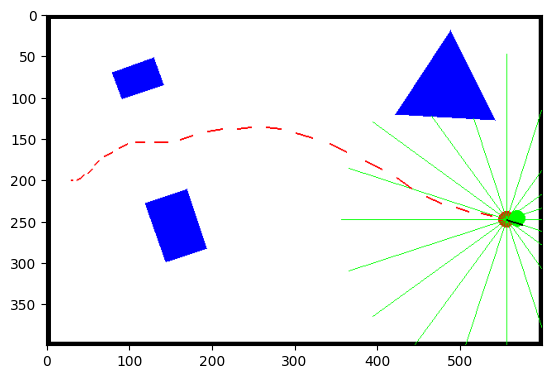

Episode 373	Average Score: 131.98Goal reached! Vel:  28.470502853393555


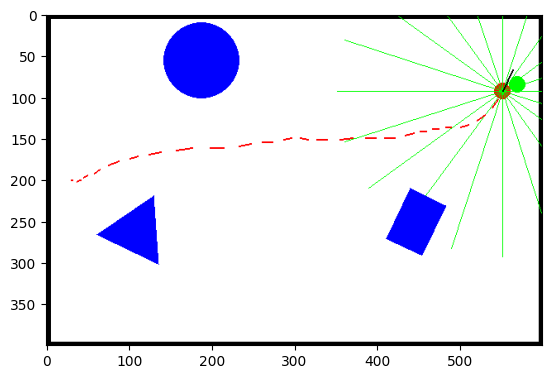

Episode 380	Average Score: 137.95Goal reached! Vel:  14.235252380371094


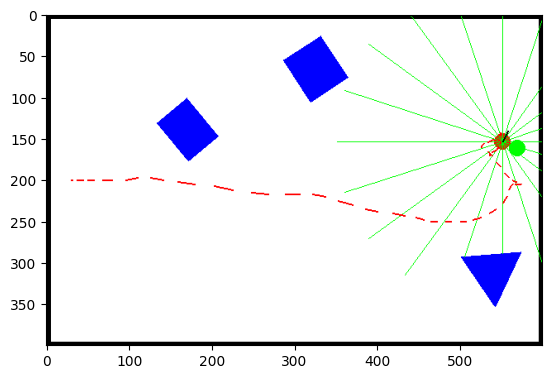

Episode 382	Average Score: 138.39Goal reached! Vel:  9.003165245056152


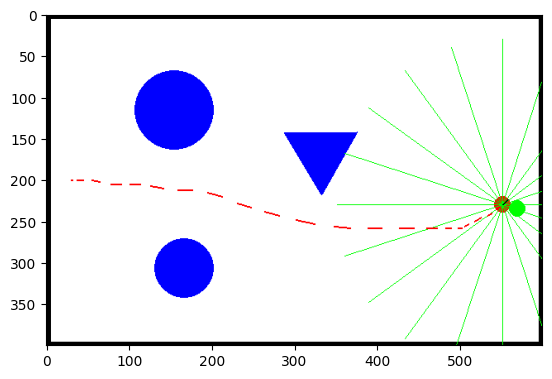

Episode 388	Average Score: 142.46Goal reached! Vel:  14.235252380371094


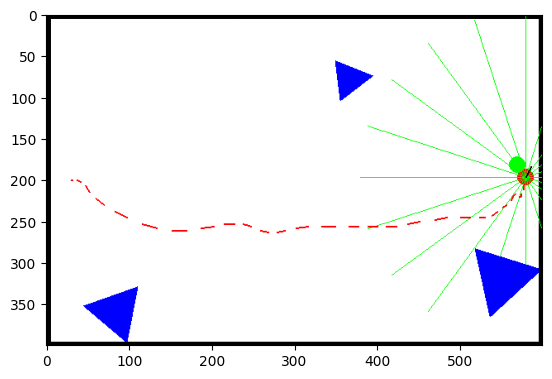

Episode 390	Average Score: 145.91Goal reached! Vel:  9.00316047668457


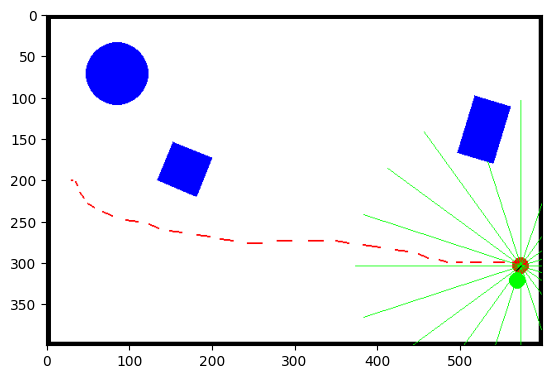

Episode 393	Average Score: 150.69Goal reached! Vel:  14.235249519348145


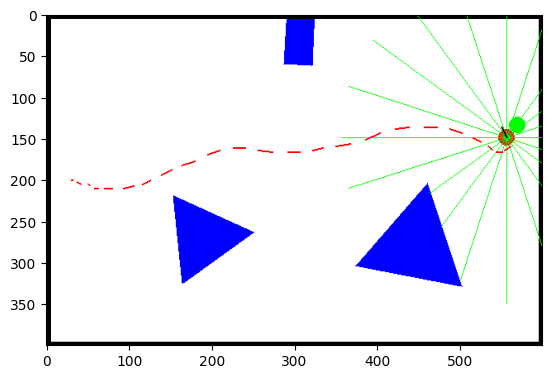

Episode 397	Average Score: 156.50Goal reached! Vel:  14.235252380371094


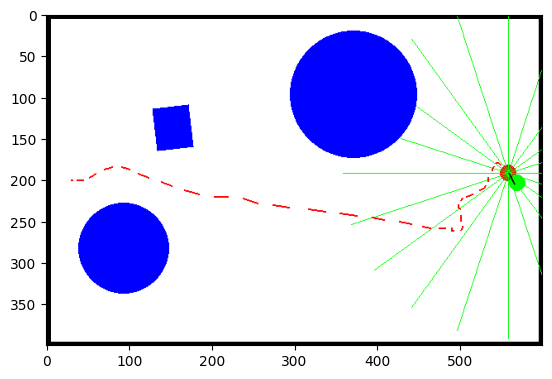

Episode 400	Average Score: 161.28

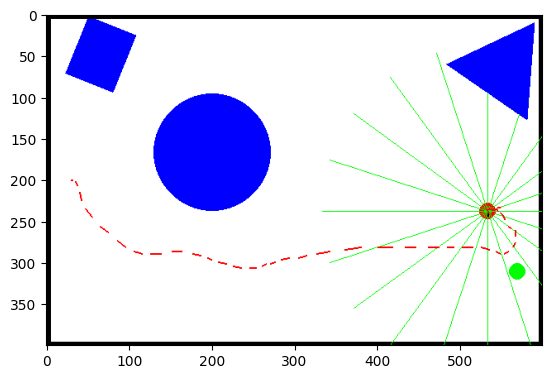

Episode 400	Average Score: 161.28, Eps: 0.135, Terminal vel: 6.366, angle:0.00, dist2goal: 4.07, ang2goal: -1.12, step: 99
Episode 402	Average Score: 160.50Goal reached! Vel:  36.012657165527344


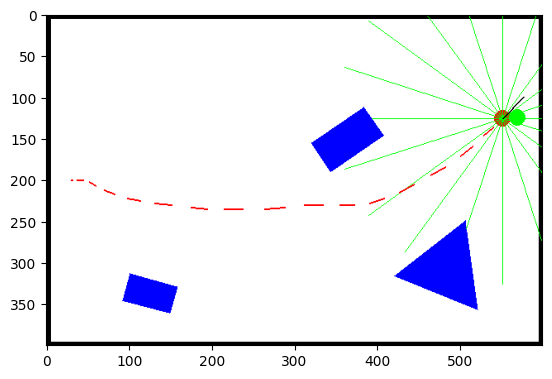

Episode 406	Average Score: 164.10Goal reached! Vel:  6.36619758605957


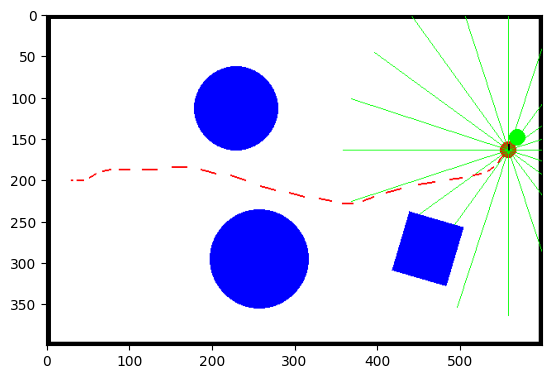

Episode 411	Average Score: 172.28Goal reached! Vel:  9.003165245056152


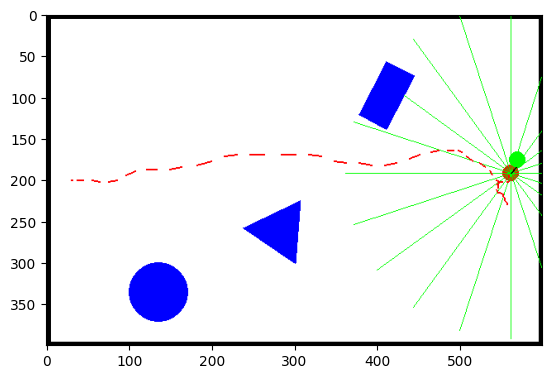

Episode 416	Average Score: 181.94Goal reached! Vel:  6.366201400756836


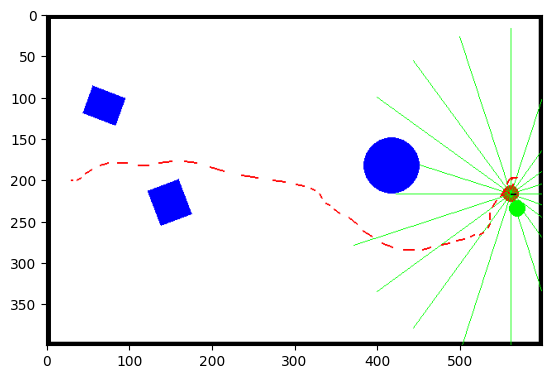

Episode 419	Average Score: 186.34Goal reached! Vel:  18.006328582763672


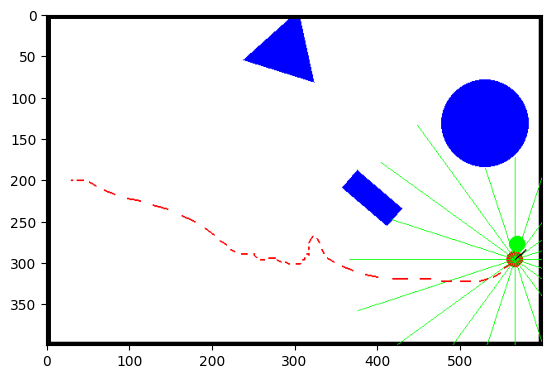

Episode 422	Average Score: 188.40Goal reached! Vel:  22.95365333557129


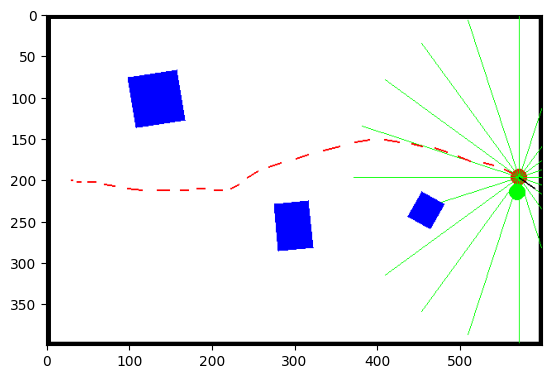

Episode 429	Average Score: 188.69Goal reached! Vel:  12.73239517211914


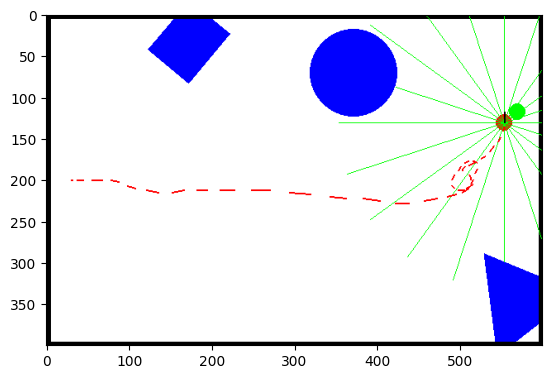

Episode 440	Average Score: 199.70Goal reached! Vel:  6.36619758605957


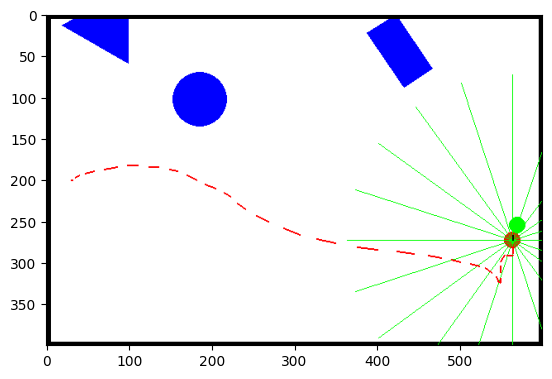

Episode 443	Average Score: 197.07Goal reached! Vel:  18.006328582763672


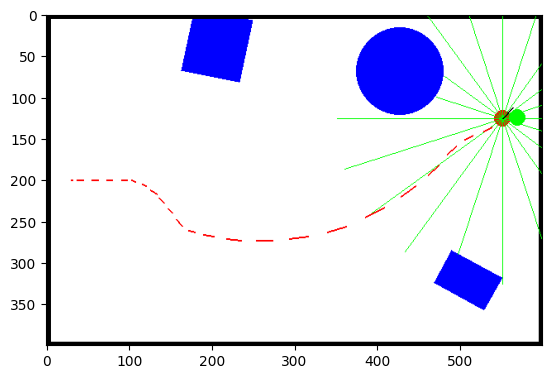

Episode 446	Average Score: 195.66Goal reached! Vel:  26.248510360717773


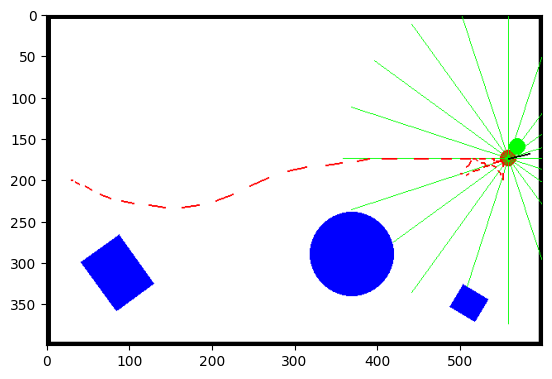

Episode 449	Average Score: 194.65Goal reached! Vel:  20.131685256958008


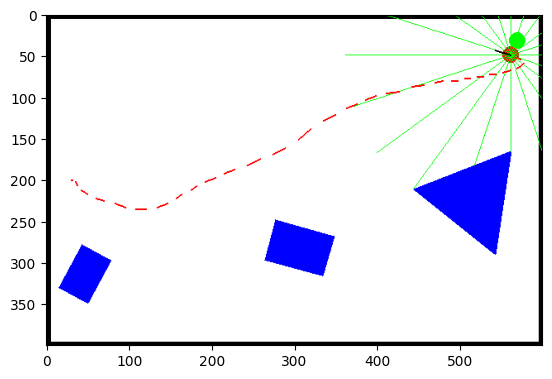

Episode 450	Average Score: 196.97Goal reached! Vel:  14.235254287719727


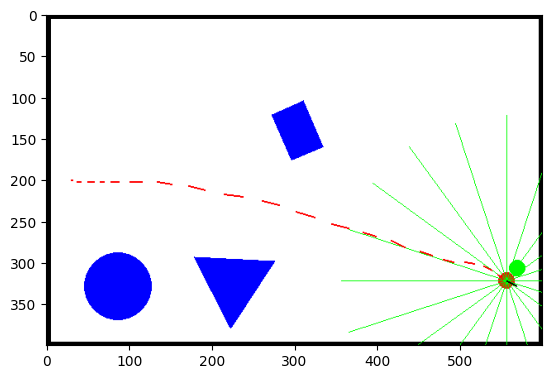

Episode 453	Average Score: 197.33Goal reached! Vel:  6.36619758605957


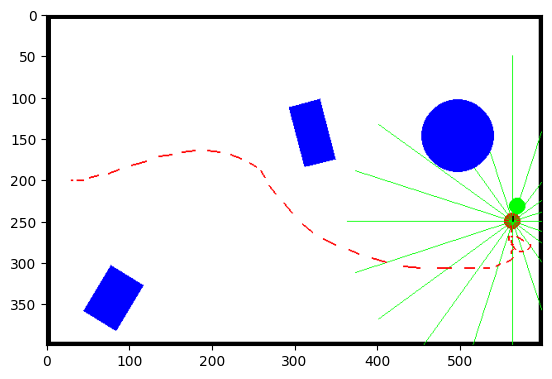

Episode 467	Average Score: 190.48Goal reached! Vel:  28.470504760742188


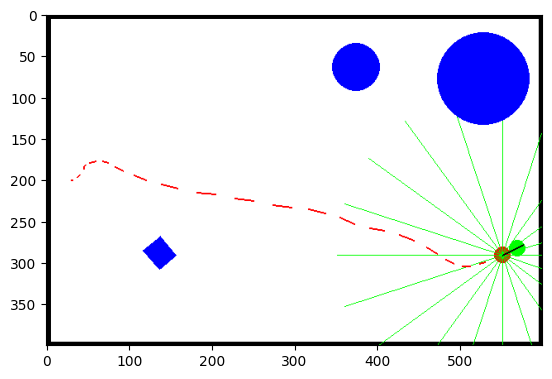

Episode 469	Average Score: 192.02Goal reached! Vel:  25.464794158935547


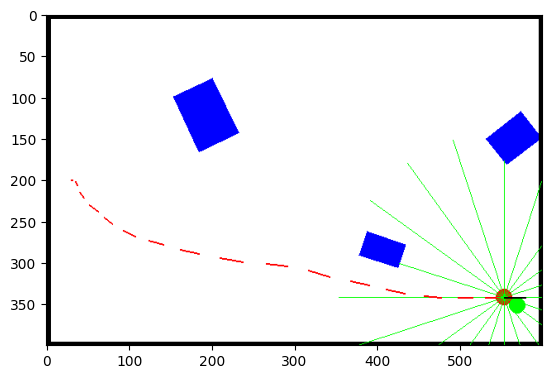

Episode 471	Average Score: 189.15Goal reached! Vel:  18.006328582763672


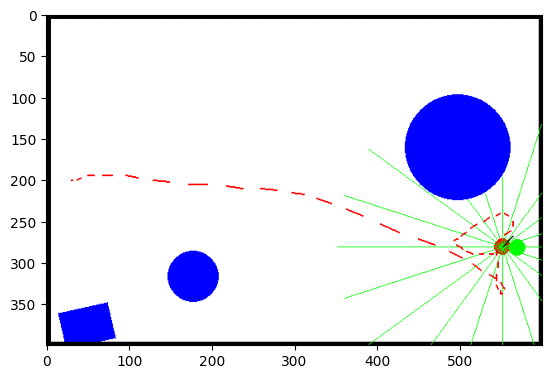

Episode 472	Average Score: 191.92Goal reached! Vel:  6.36619758605957


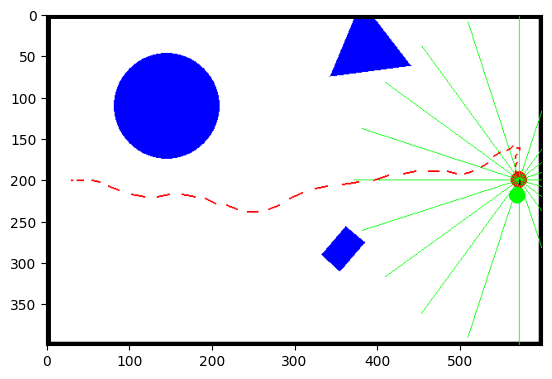

Episode 474	Average Score: 188.92Goal reached! Vel:  19.09859275817871


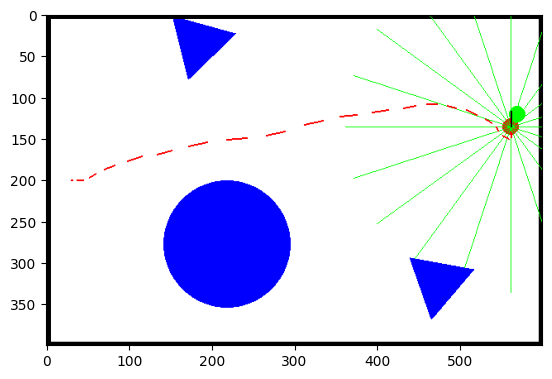

Episode 477	Average Score: 193.13Goal reached! Vel:  19.098596572875977


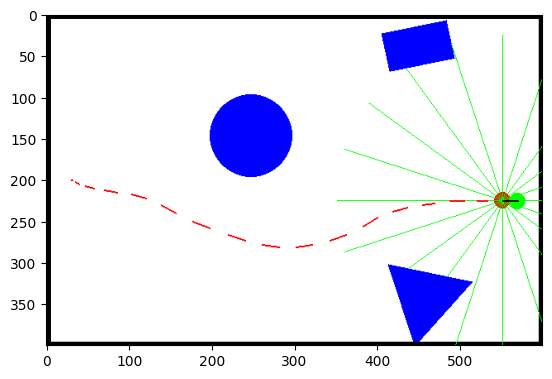

Episode 478	Average Score: 194.38Goal reached! Vel:  6.366201400756836


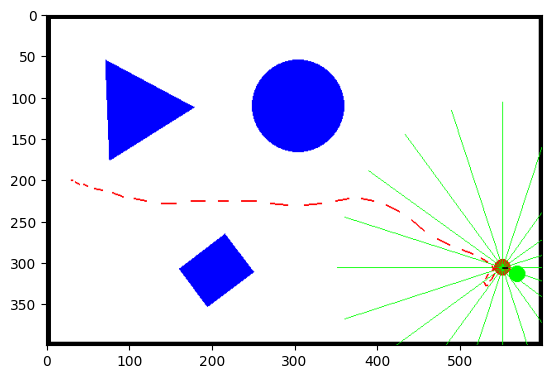

Episode 480	Average Score: 193.25Goal reached! Vel:  28.470504760742188


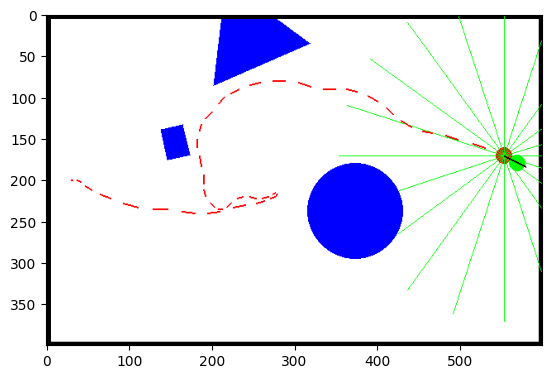

Episode 497	Average Score: 182.06Goal reached! Vel:  22.95365333557129


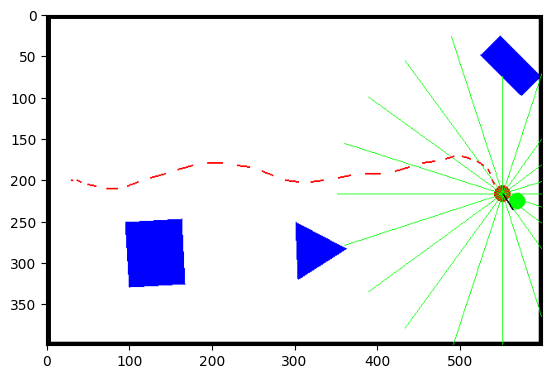

Episode 500	Average Score: 181.72

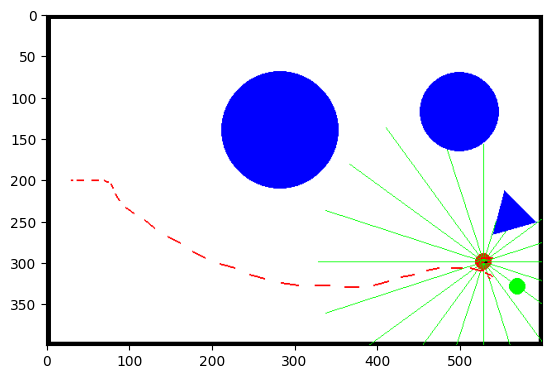

Episode 500	Average Score: 181.72, Eps: 0.082, Terminal vel: 6.366, angle:0.00, dist2goal: 2.54, ang2goal: -0.64, step: 99
Episode 505	Average Score: 179.44Goal reached! Vel:  31.83098793029785


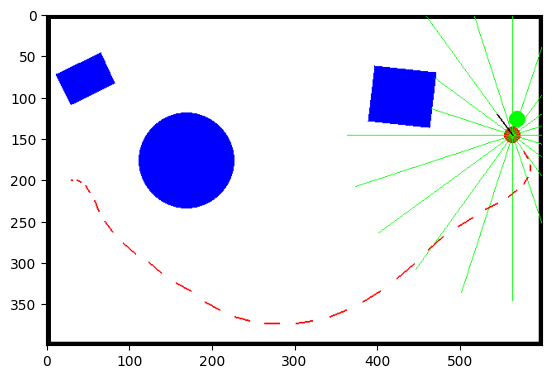

Episode 536	Average Score: 187.85Goal reached! Vel:  6.36619758605957


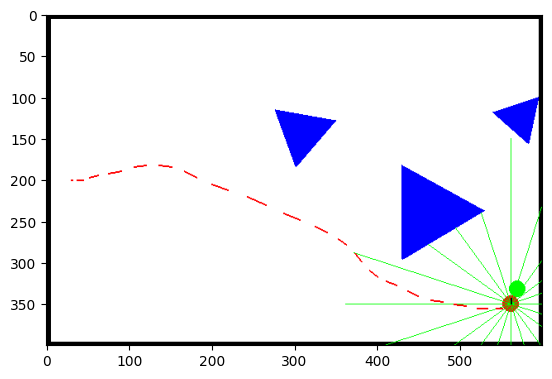

Episode 547	Average Score: 189.24Goal reached! Vel:  9.003165245056152


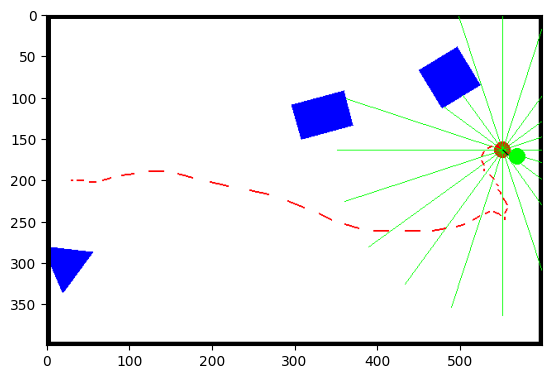

Episode 550	Average Score: 194.42Goal reached! Vel:  22.95365333557129


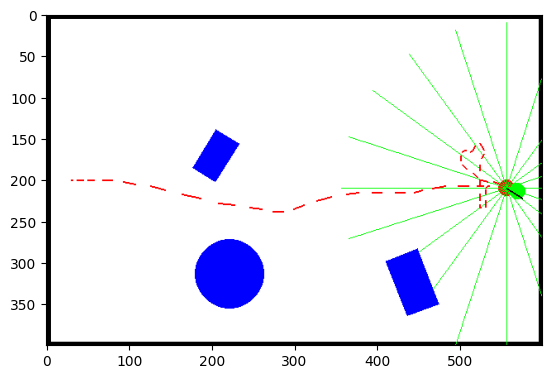

Episode 563	Average Score: 208.97Goal reached! Vel:  37.120994567871094


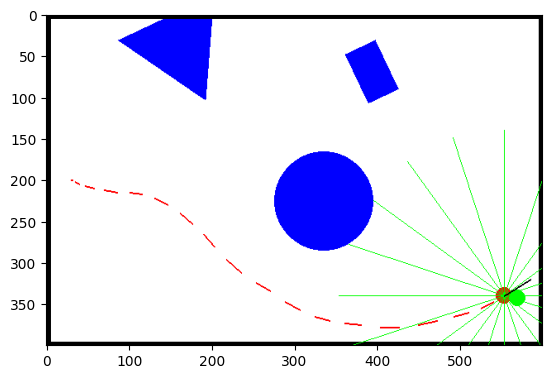

Episode 567	Average Score: 219.56Goal reached! Vel:  6.36619758605957


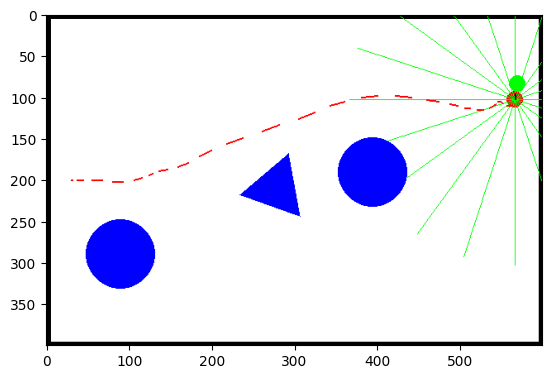

Episode 573	Average Score: 218.68Goal reached! Vel:  6.36619758605957


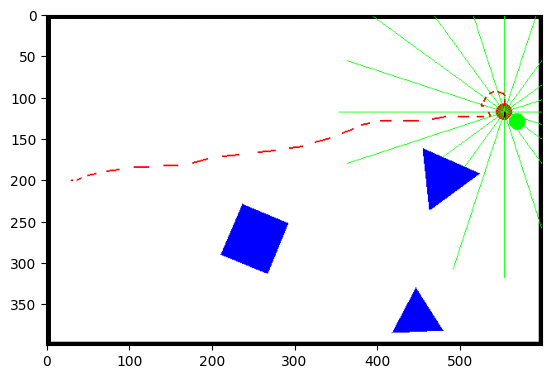

Episode 578	Average Score: 219.86

In [4]:
# Make an environment
env = SimpleUAVEnv()
state_size = STATE_SPACE
action_size = ACTION_SPACE

# Initilize a DQN agent
agent = DQNAgent(state_size, action_size, learning_rate=0.001)

# Train it
scores, final_states_images = train(agent, env, 2000, n_max_step=100, print_every=100)

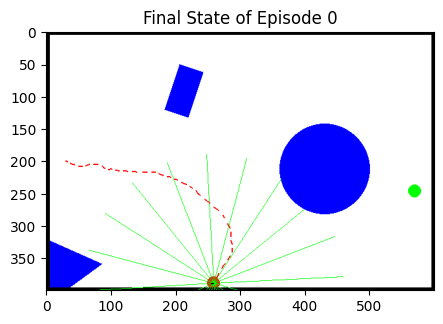

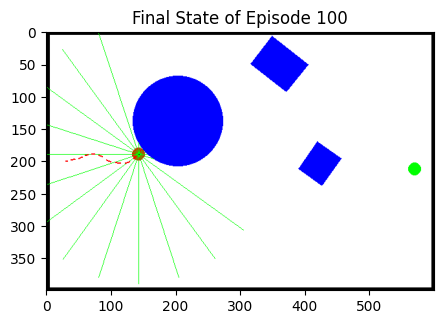

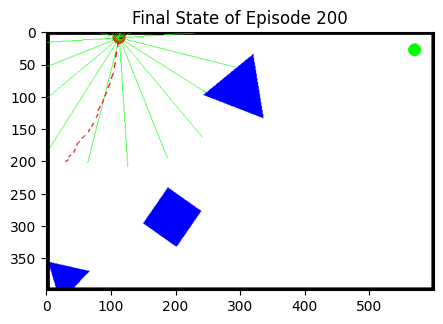

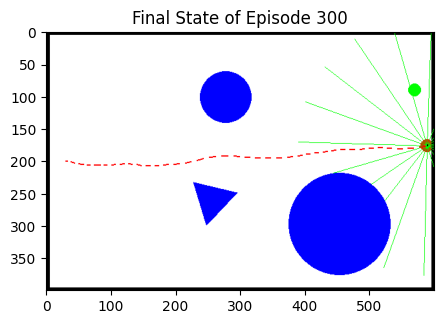

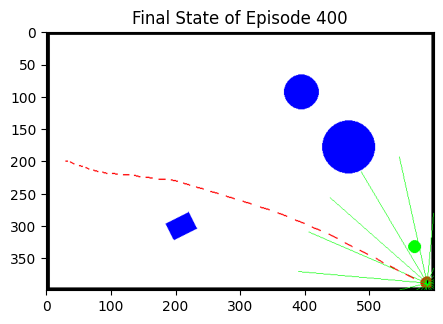

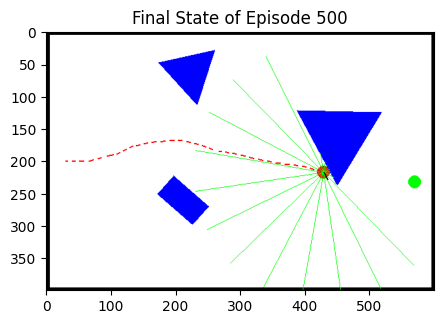

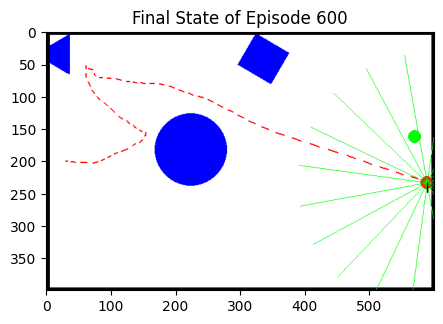

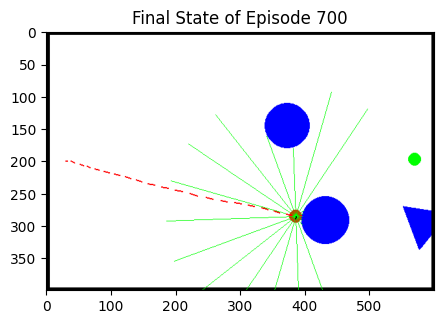

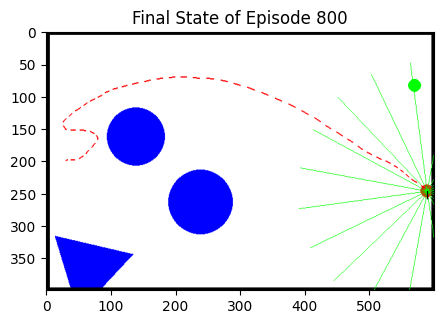

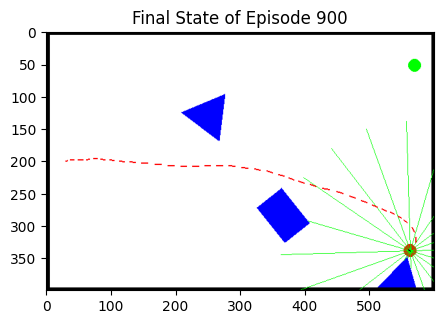

In [ ]:
# Plotting the final states
for i, img in enumerate(final_states_images):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Final State of Episode {i*100}')
    plt.show()